# 3.2.4 Introducing the interoceptive observer

To be able to generalize their training when not provided an explicit feedback, it seems necessary (but not sufficient) that subject develop (or finetune) an internal obseration modality, that would map physiological signals to their cognitive states. 

This simulation provides this alternative observation modality, encoded as a noisy signal relating to the true cognitive state of the subject following $\mathbf{A^{intero}} = Normalize(Discr(N(\mathbf{\hat{s}}, \sigma_{intero})))$.  Importantly, the subjects were simulated without any previous knowledge about this observation modality ($\mathbf{a_{\dag=0}^{intero}} = k2_a \mathbb{1}$) and had to rely on the feedback signal to infer its mapping. The initial subject confidence in its perception mapping ($k2_a$) encoded how easy it was for the subject to change its interoceptive model.

We use a model given an Interoceptive Observer (IO), provided in the m1_IO_model.py file.

In [1]:
# Make basic package imports
import numpy as np
import statistics as stat
import scipy.stats as scistats
import math,sys,os
import pickle 
import matplotlib.pyplot as plt

# Import actynf and the functions to help us plot the results
import actynf
from tools import simulate_and_save,extract_training_data # Saving and loading simulation outputs
from tools import dist_kl_dir # A tool to qualify subject learning
from tools import pointcloud_mean,clever_running_mean # Plot the mean + std of several points

from tools_trial_plots import plot_one_trial,plot_training_curve # Plotting individual trials / subject performances accross several trials
from m1_IO_model import neurofeedback_training as interoceptive_network # The Active Inference model we use

SAVING_FOLDER = os.path.join("..","..","simulation_outputs","paper1","3.2.4")
print("Results will be saved to " + SAVING_FOLDER + " (relative to this file)")

# Functions defining the model and plotting the results !

# Here, we set the learn_a parameter to True and k1a becomes a parameter !
# Please note that we also set epsilon_a to 0.01 instead of 0, in effect allowing
# our agent to learn mappings outside of the pre-training discretized normal distribution.
def run_and_save_interoceptive_model(savepath,
        true_feedback_std,true_intero_std, # True environment parameters
        belief_feedback_std,k1a,k2a,       # Subject initial parameters
        Nsubj,Ntrials,
        overwrite=False):
    """
    Run a simulation of model m1 using the following parameters : 
    - savepath : where to store simulation outputs
    - true_feedback_std : wanted sigma_process value
    - belief_feedback_std : wanted sigma_model value for the feedback
    - true_intero_std : true noise of the interoceptive modality
    - k1a / k2a : initial observations models confidence
    - Nsubj : subjects simulated for the simulations
    - Ntrials : how many trials simulated per subject (duration of the training)
    - overwrite : run simulations even if there exist results already ?
    """
    learn_a = True

    T = 10
    Th = 2
    feedback_resolution = 5 # No

    subj_cognitive_resolution = 5 # Ns (model)
    true_cognitive_resolution = 5 # Ns (process)

    k1b = 1.0   # Initial action mapping weight
    epsilon_b = 1.0

         # Initial feedback mapping weight (model)
    epsilon_a = 0.01   # Added uniform distribution weight added
        # a0 is defined as = norm(epsilon_a* ones + gaussian_prior)*k1a

    k1d = 1.0   # Initial starting state mapping weight (model)
    epsilon_d = 1.0  # Added uniform distribution weight added
        # d0 is defined as = norm(epsilon_d* ones + [1,1,0,0,0])*k1d   [for Ns=5]
    
    neutral_action_prop = 0.2 # 20% of the actions have no effect on the subject cognitive state

    pRest = 0.5   # Without any increasing action, there is a pRest chance that the cognitive state will decrease spontaneously
    pEffect  = 0.99   # An adequate action will increase the subject mental state with a probability pEffect

    action_selection_inverse_temp = 32.0 # How much noise in the selection of actions after EFE calculation
    
    net = interoceptive_network(T,Th,  # Trial duration + temporal horizon
            subj_cognitive_resolution,true_cognitive_resolution,       # Subject belief about cognitive resolution / true cognitive resolution
            feedback_resolution,feedback_resolution,       # Subject belief about feedback resolution / true feedback resolution
            belief_feedback_std,true_feedback_std,true_intero_std,   # Subject belief about feedback noise / true feedback noise
            neutral_action_prop,       # how many actions have no impact on the state ?
            k1b,epsilon_b,  # Action mapping previous knowledge
            k1a,epsilon_a,k2a,   # Feedback mapping previous knowledge
            k1d,epsilon_d,   # d mapping previous knowledge
            pRest,pEffect,   # How likely it is that the cognitive state will go down when unattended
                        # / how likely it is that the correct action will increase the cognitive state
            asit = action_selection_inverse_temp,learn_a=learn_a) 
                        # Clamp : Weither to increase the categorical probabilistic weights
                        # on the edges or not
                        # asit : inverse temperature of the action selection process
                        # learn_a : Weither to learn the perception matrix on the go                                      
    
    simulate_and_save(net,savepath,Nsubj,Ntrials,override=overwrite)

Results will be saved to ..\..\simulation_outputs\paper1\3.2.4 (relative to this file)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

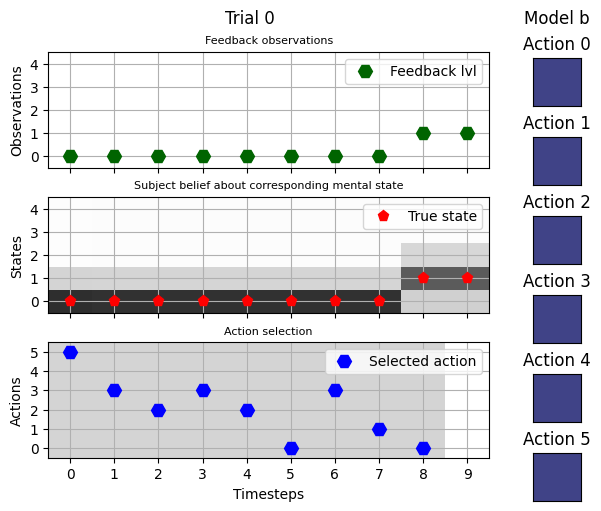

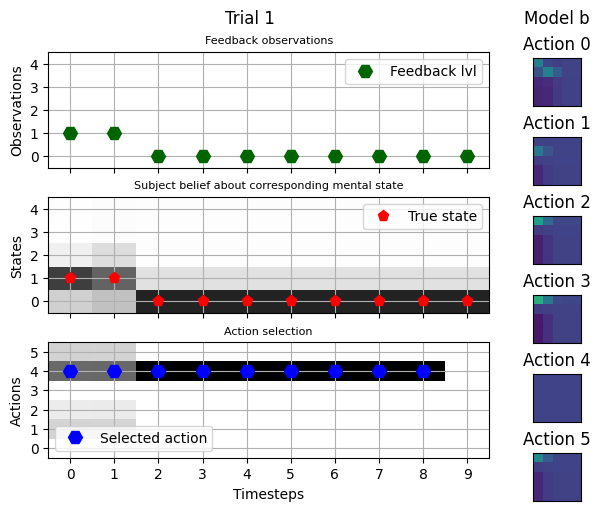

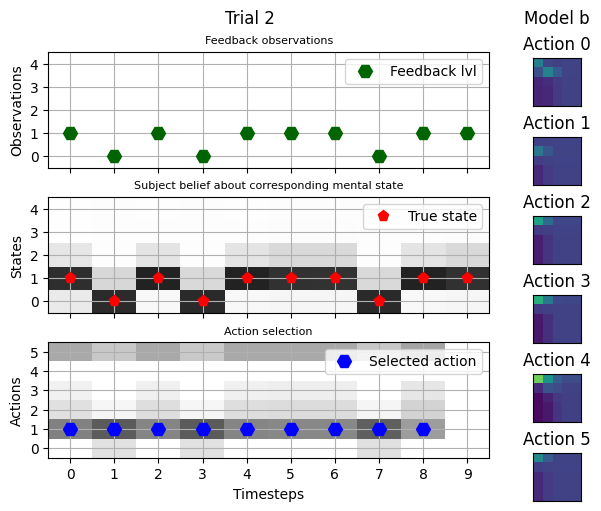

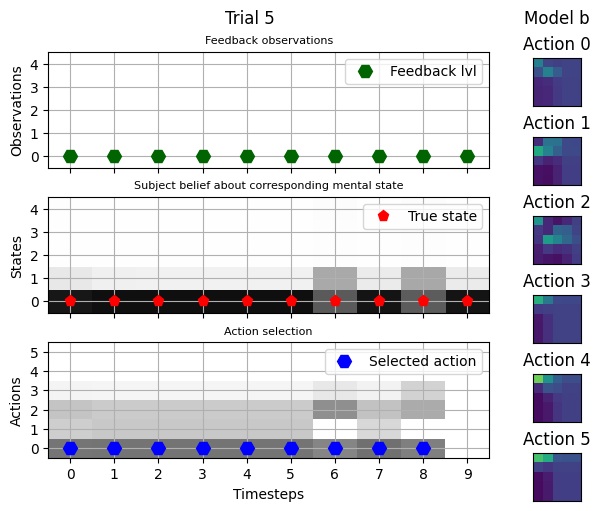

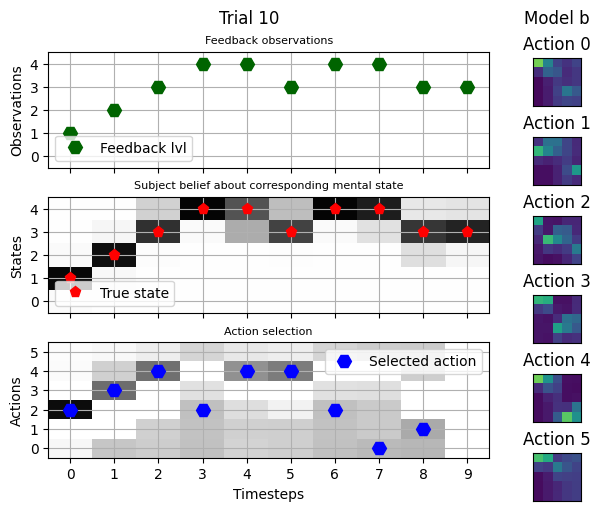

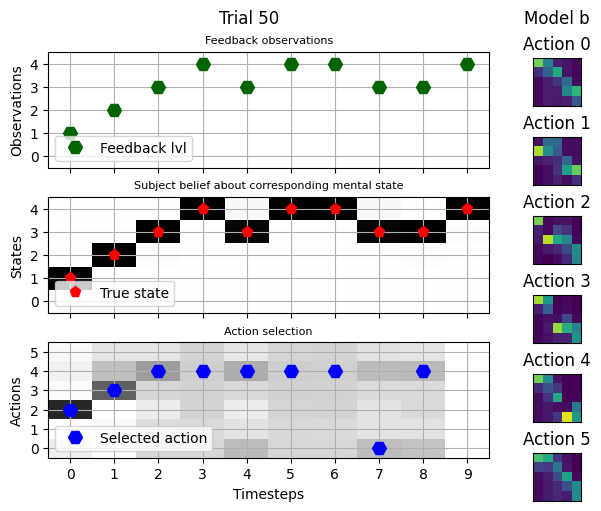

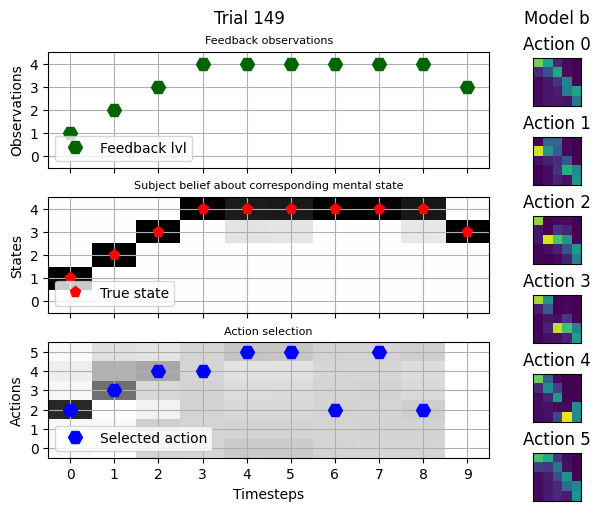

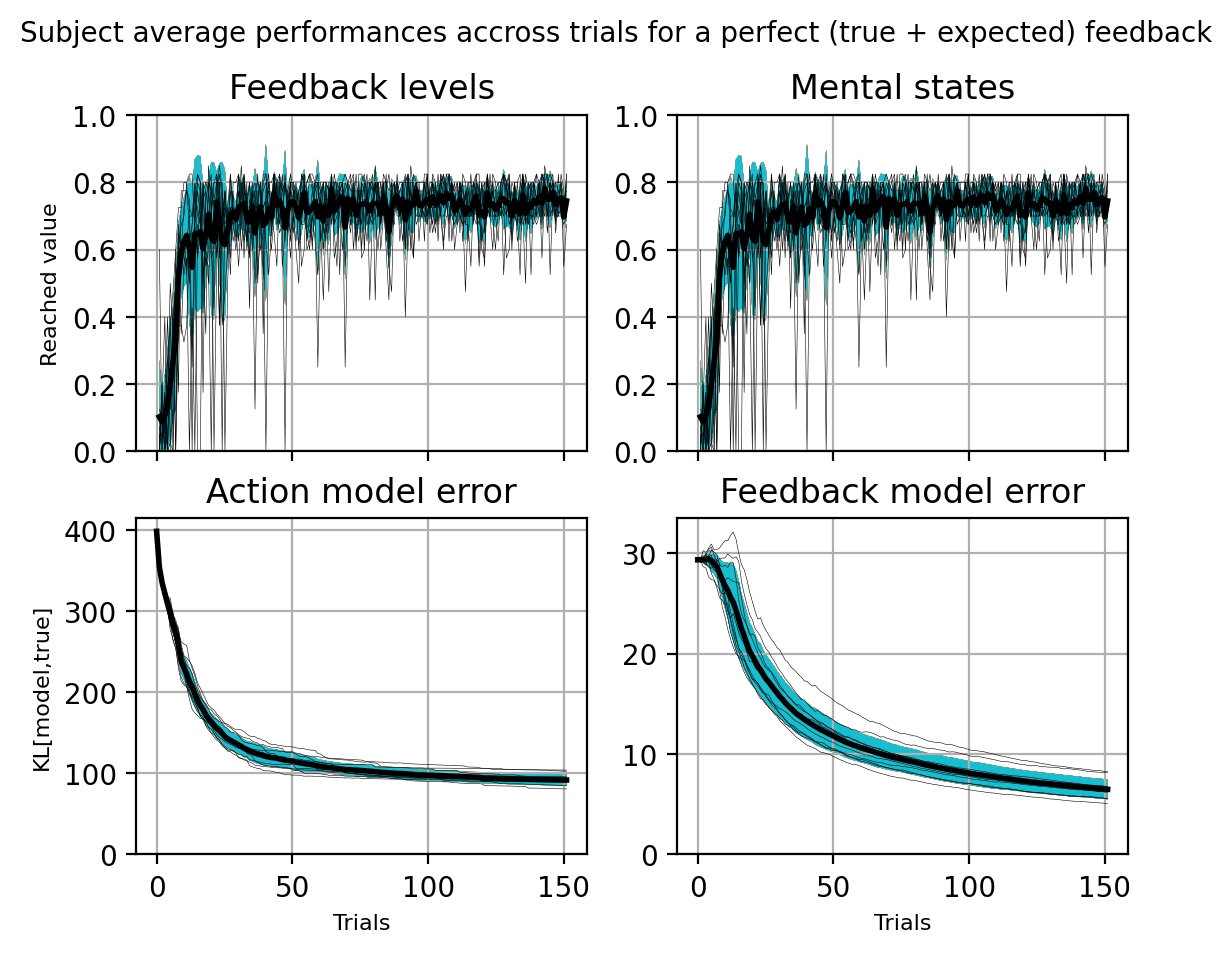

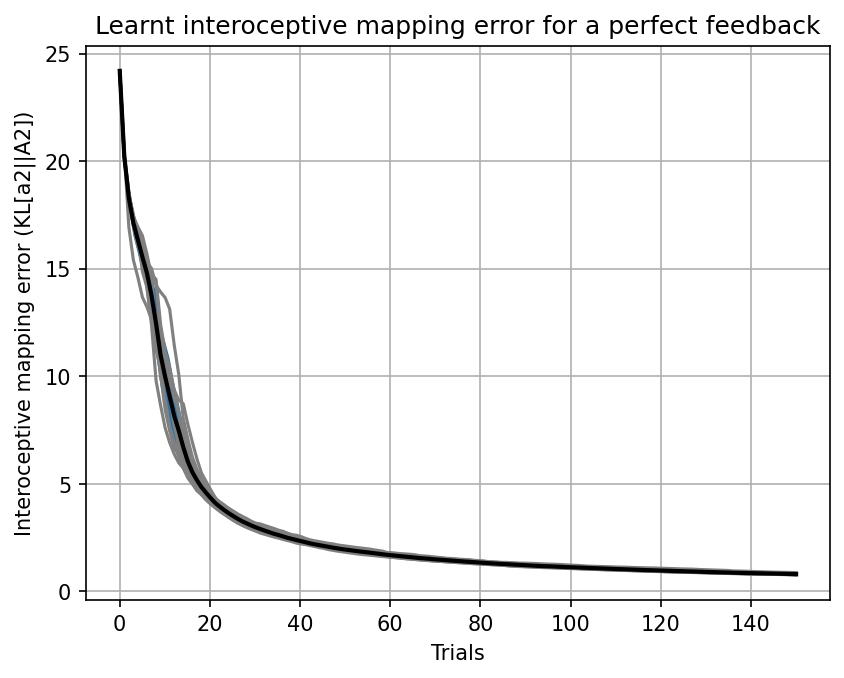

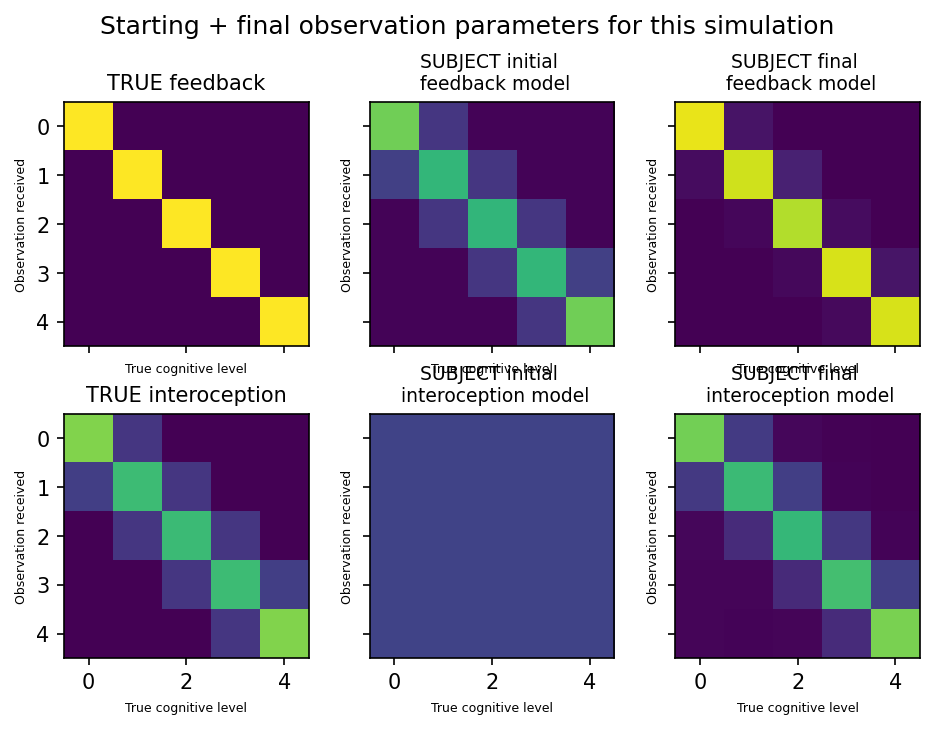

In [2]:
savepath = os.path.join(SAVING_FOLDER,"simulation1")

sigma_process = 0.01 # The noise of the feedback
sigma_intero = 0.5 # The noise of the interoceptive observer
sigma_model = 0.5  # The subject belief about interoceptive observer noise
k1a = 10.0 # The subject is confident in its initial (external) feedback prior
k2a = 10.0 # The subject is pretty used to its interoceptive signal and it takes quite a lot of experience to tweak it

N_subj = 10
N_trials = 150

run_and_save_interoceptive_model(savepath,
        sigma_process,sigma_intero, # True environment parameters
        sigma_model,k1a,k2a,       # Subject initial parameters
        N_subj,N_trials,
        overwrite=False)

# PLOTTING SIMULATION RESULTS
_stm,_weight,_Nsubj,_Ntrials = extract_training_data(savepath)
subject = 4 # What subject are we studying ?
plot_these_trials = [0,1,2,5,10,50,149]
for trial in (plot_these_trials):
    plot_one_trial(_stm,_weight,subject,trial,"Trial " + str(trial))
figure = plot_training_curve(_stm,_weight,"Subject average performances accross trials for a perfect (true + expected) feedback")

# Plot the interoceptive mapping error 
fig2,ax2 = plt.subplots(1,dpi=150,sharex=True,sharey=True)
true_A = _weight[0][0][0]["a"][1]
a_dist_array = np.array([[dist_kl_dir(_weight[subj][trial][1]["a"][1],true_A) for trial in range(_Ntrials)] for subj in range(_Nsubj)])
xs = np.linspace(0,a_dist_array.shape[1],a_dist_array.shape[1])
mean_intero = np.mean(a_dist_array,axis=0)
std_intero = np.std(a_dist_array,axis=0)
ax2.fill_between(xs,mean_intero-std_intero,mean_intero+std_intero)
for i in range(a_dist_array.shape[0]):
    ax2.plot(xs,a_dist_array[i,:],color='grey')
ax2.plot(xs,mean_intero,color="black",linewidth=2)
ax2.set_title("Learnt interoceptive mapping error for a perfect feedback")
ax2.set_xlabel("Trials")
ax2.set_ylabel("Interoceptive mapping error (KL[a2||A2])")
ax2.grid()

# Plot feedback perception matrices
fig,axes = plt.subplots(2,3,dpi=150,sharex=True,sharey=True)
axes[0,0].imshow(actynf.normalize(_weight[0][0][0]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,0].set_title("TRUE feedback",fontsize = 10)
axes[0,1].imshow(actynf.normalize(_weight[0][0][1]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,1].set_title("SUBJECT initial \n feedback model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][0].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][0]
axes[0,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[0,2].set_title("SUBJECT final \n feedback model",fontsize = 9)

axes[1,0].imshow(actynf.normalize(_weight[0][0][0]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,0].set_title("TRUE interoception",fontsize = 10)
axes[1,1].imshow(actynf.normalize(_weight[0][0][1]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,1].set_title("SUBJECT initial \n interoception model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][1].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][1]
axes[1,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[1,2].set_title("SUBJECT final \n interoception model",fontsize = 9)

for ax in axes.reshape(-1):
    ax.set_ylabel("Observation received",fontsize = 6)
    ax.set_xlabel("True cognitive level",fontsize = 6)
fig.suptitle("Starting + final observation parameters for this simulation")
fig.tight_layout()

We can compare the results of this simulation with simulation 1 of part 3.2.3 ! The final cognitive levels reached as well as the feedback are the same, but the quality of the feedback and mental action models get much better ! This new observation modality, even if the subject does not start with any prior about it, makes training easier !

Just like in the 2nd simulation of 3.2.3, let's plot the same training with a noiser biomarker but a more confident subject !

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

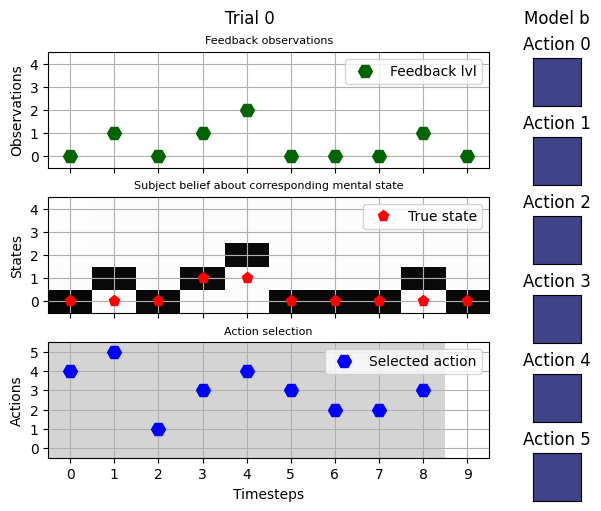

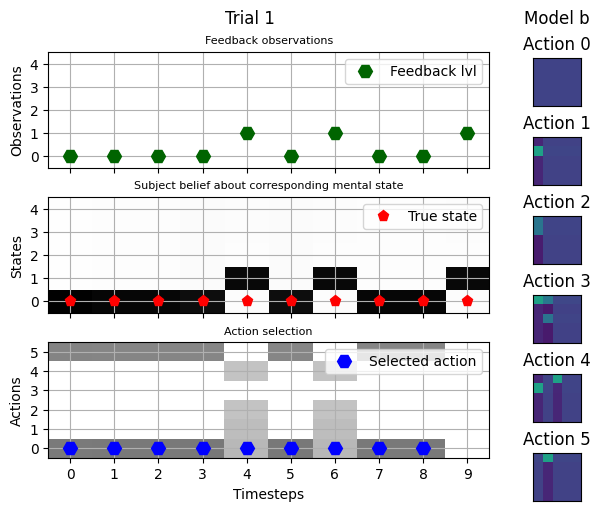

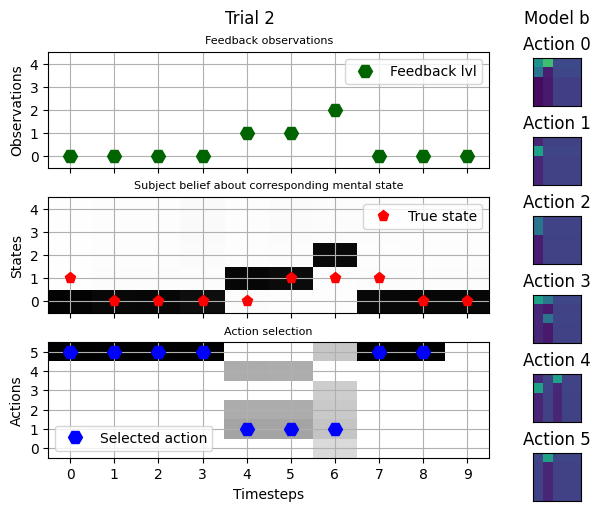

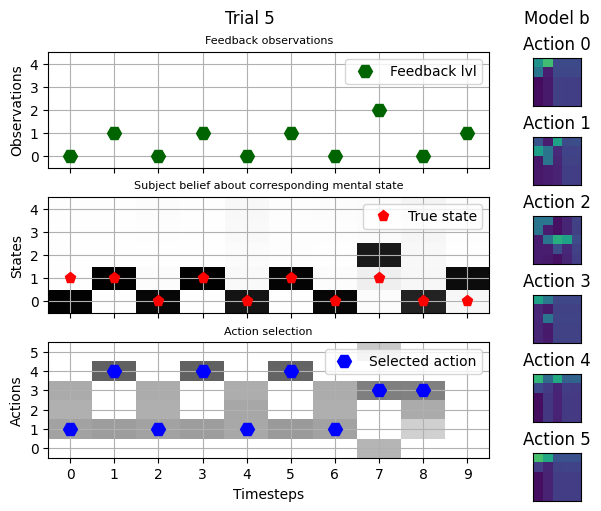

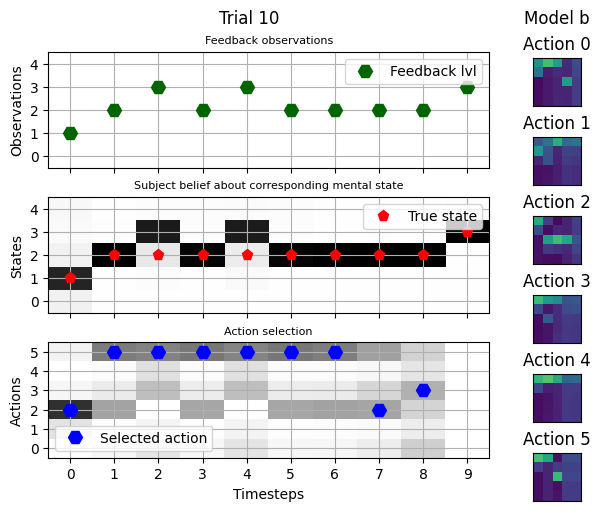

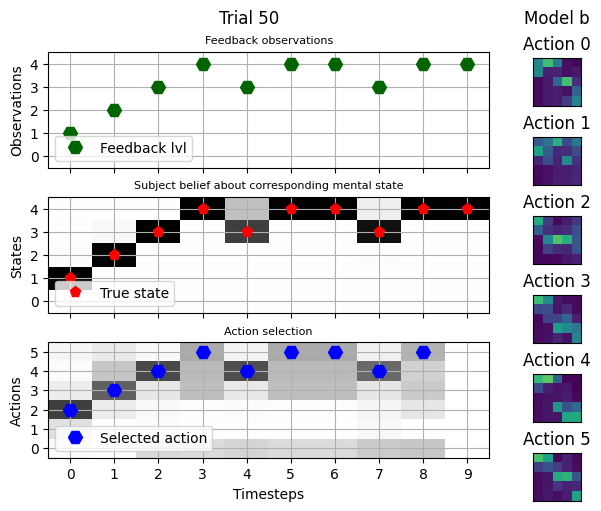

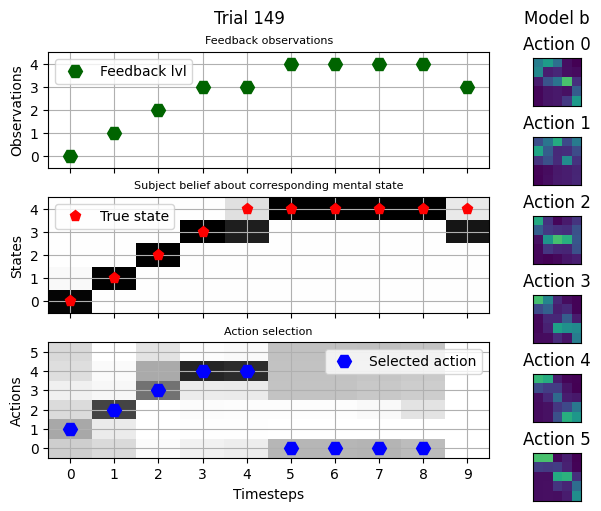

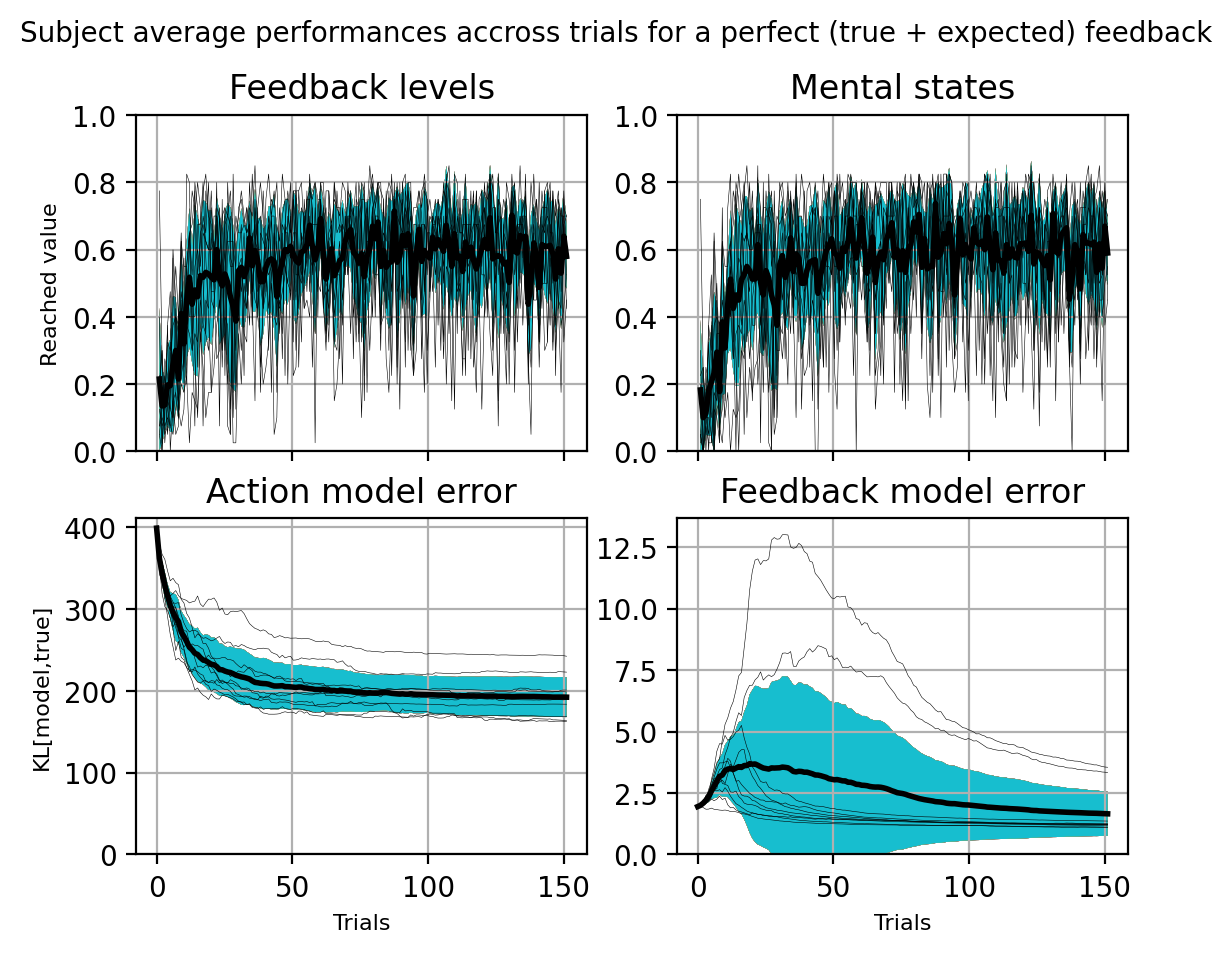

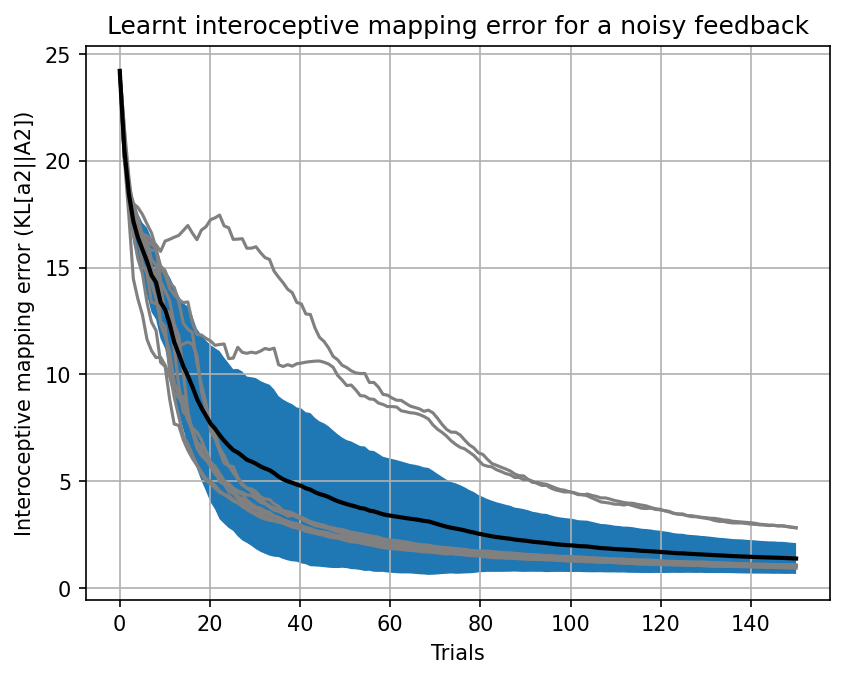

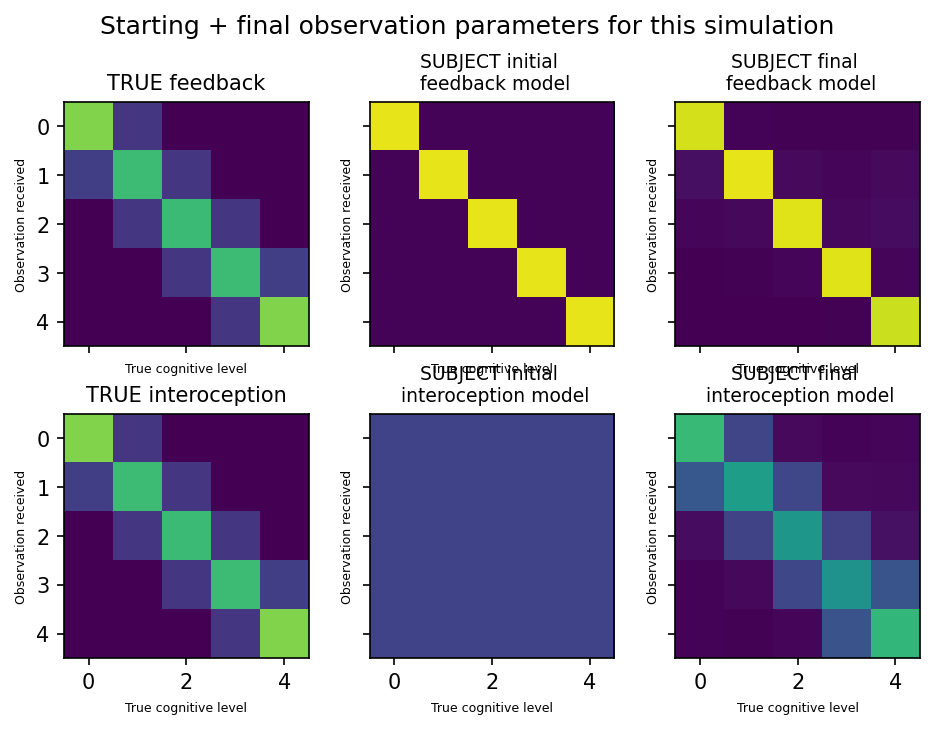

In [3]:
savepath = os.path.join(SAVING_FOLDER,"simulation2")

sigma_process = 0.5 # The noise of the feedback
sigma_intero = 0.5 # The noise of the interoceptive observer
sigma_model = 0.01  # The subject belief about interoceptive observer noise
k1a = 10.0 # The subject is confident in its initial (external) feedback prior
k2a = 10.0 # The subject is pretty used to its interoceptive signal and it takes quite a lot of experience to tweak it

N_subj = 10
N_trials = 150

run_and_save_interoceptive_model(savepath,
        sigma_process,sigma_intero, # True environment parameters
        sigma_model,k1a,k2a,       # Subject initial parameters
        N_subj,N_trials,
        overwrite=False)

# PLOTTING SIMULATION RESULTS
_stm,_weight,_Nsubj,_Ntrials = extract_training_data(savepath)
subject = 4 # What subject are we studying ?
plot_these_trials = [0,1,2,5,10,50,149]
for trial in (plot_these_trials):
    plot_one_trial(_stm,_weight,subject,trial,"Trial " + str(trial))
figure = plot_training_curve(_stm,_weight,"Subject average performances accross trials for a perfect (true + expected) feedback")

# Plot the interoceptive mapping error 
fig2,ax2 = plt.subplots(1,dpi=150,sharex=True,sharey=True)
true_A = _weight[subj][0][0]["a"][1]
a_dist_array = np.array([[dist_kl_dir(_weight[subj][trial][1]["a"][1],true_A) for trial in range(_Ntrials)] for subj in range(_Nsubj)])
xs = np.linspace(0,a_dist_array.shape[1],a_dist_array.shape[1])
mean_intero = np.mean(a_dist_array,axis=0)
std_intero = np.std(a_dist_array,axis=0)
ax2.fill_between(xs,mean_intero-std_intero,mean_intero+std_intero)
for i in range(a_dist_array.shape[0]):
    ax2.plot(xs,a_dist_array[i,:],color='grey')
ax2.plot(xs,mean_intero,color="black",linewidth=2)
ax2.set_title("Learnt interoceptive mapping error for a noisy feedback")
ax2.set_xlabel("Trials")
ax2.set_ylabel("Interoceptive mapping error (KL[a2||A2])")
ax2.grid()

# Plot feedback perception matrices
fig,axes = plt.subplots(2,3,dpi=150,sharex=True,sharey=True)
axes[0,0].imshow(actynf.normalize(_weight[0][0][0]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,0].set_title("TRUE feedback",fontsize = 10)
axes[0,1].imshow(actynf.normalize(_weight[0][0][1]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,1].set_title("SUBJECT initial \n feedback model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][0].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][0]
axes[0,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[0,2].set_title("SUBJECT final \n feedback model",fontsize = 9)

axes[1,0].imshow(actynf.normalize(_weight[0][0][0]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,0].set_title("TRUE interoception",fontsize = 10)
axes[1,1].imshow(actynf.normalize(_weight[0][0][1]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,1].set_title("SUBJECT initial \n interoception model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][1].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][1]
axes[1,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[1,2].set_title("SUBJECT final \n interoception model",fontsize = 9)

for ax in axes.reshape(-1):
    ax.set_ylabel("Observation received",fontsize = 6)
    ax.set_xlabel("True cognitive level",fontsize = 6)
fig.suptitle("Starting + final observation parameters for this simulation")
fig.tight_layout()

And with a much poorer feedback : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

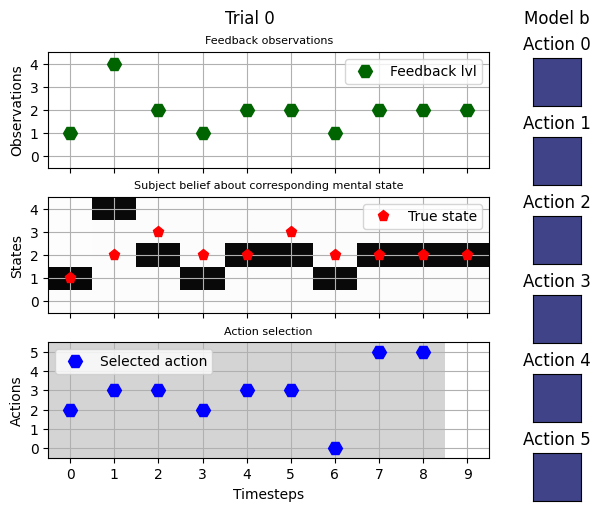

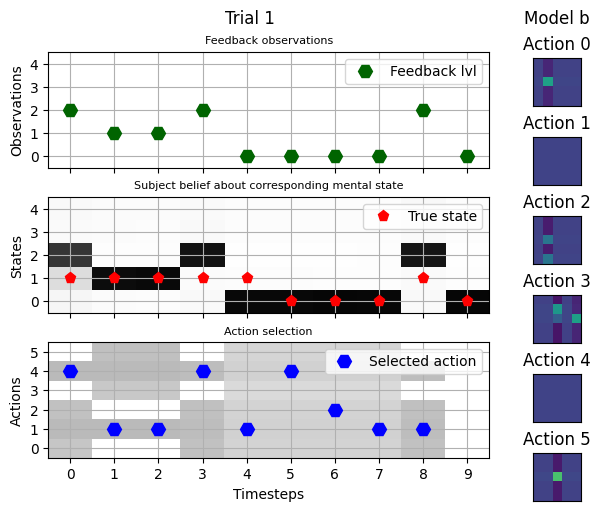

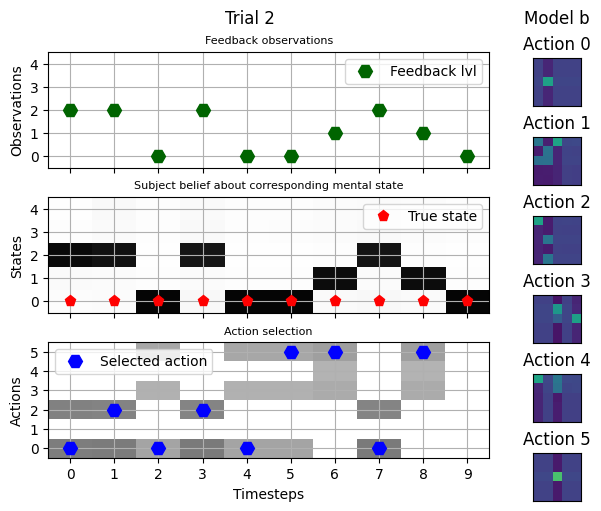

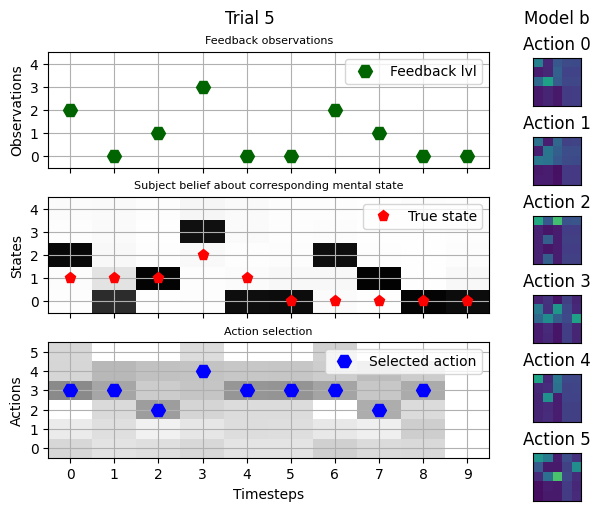

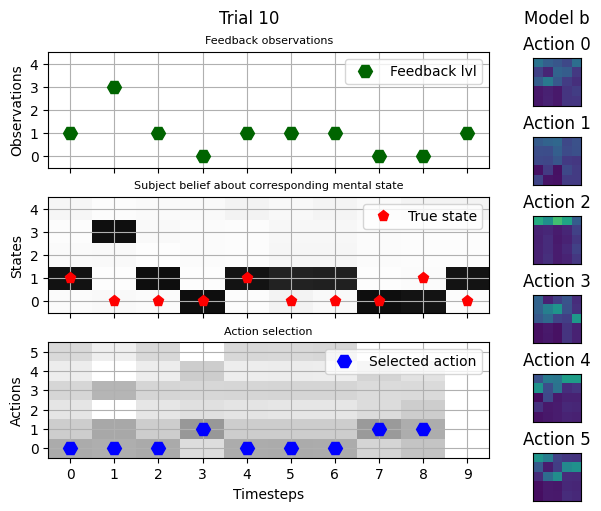

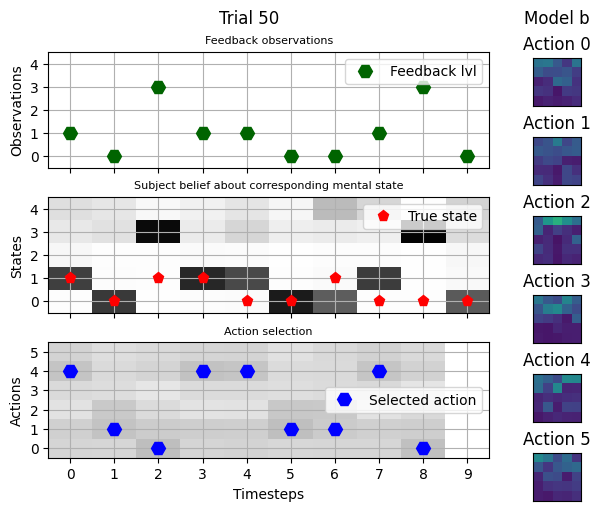

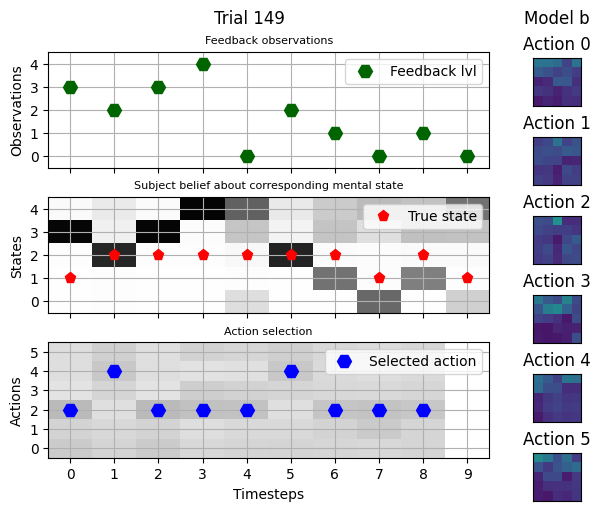

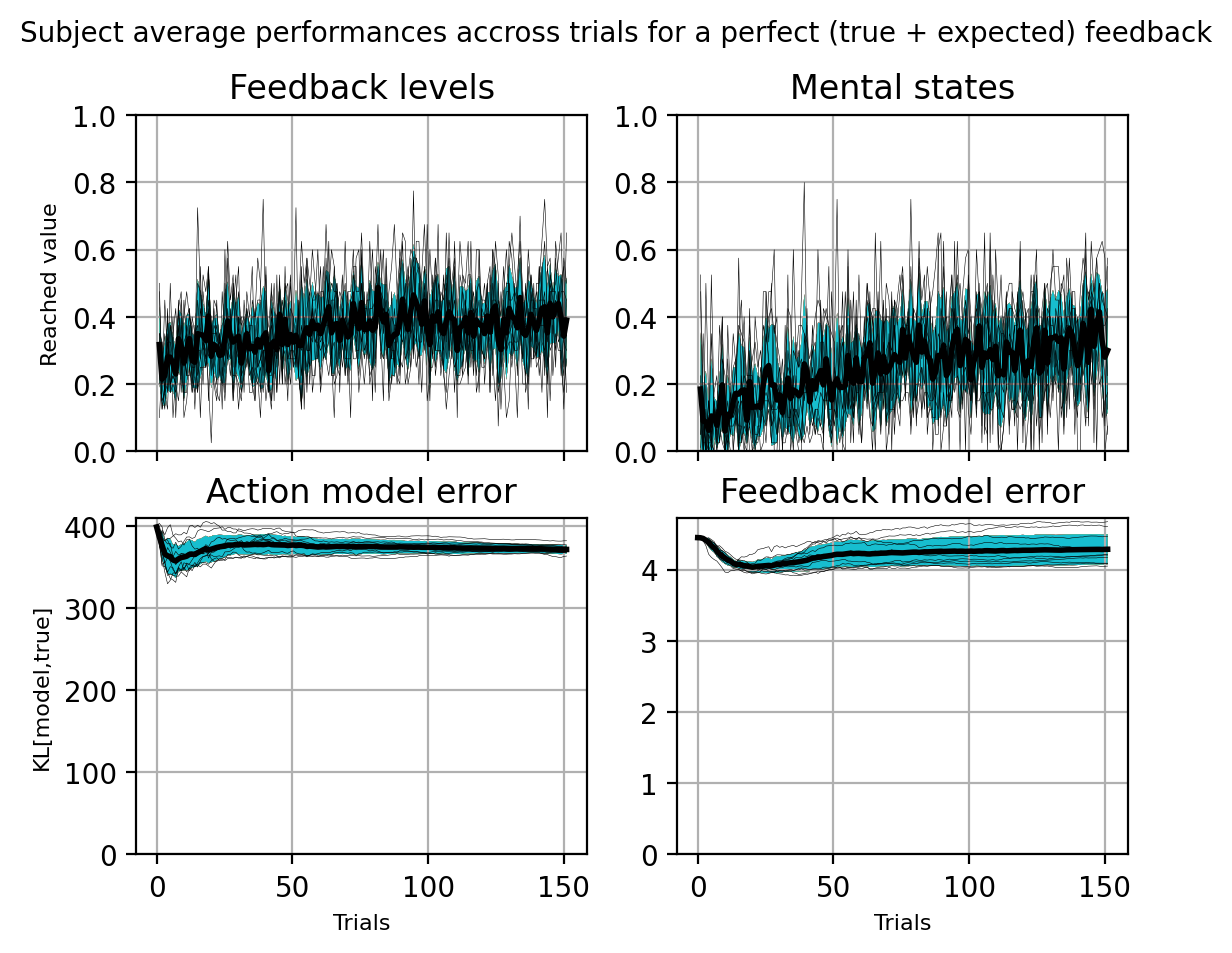

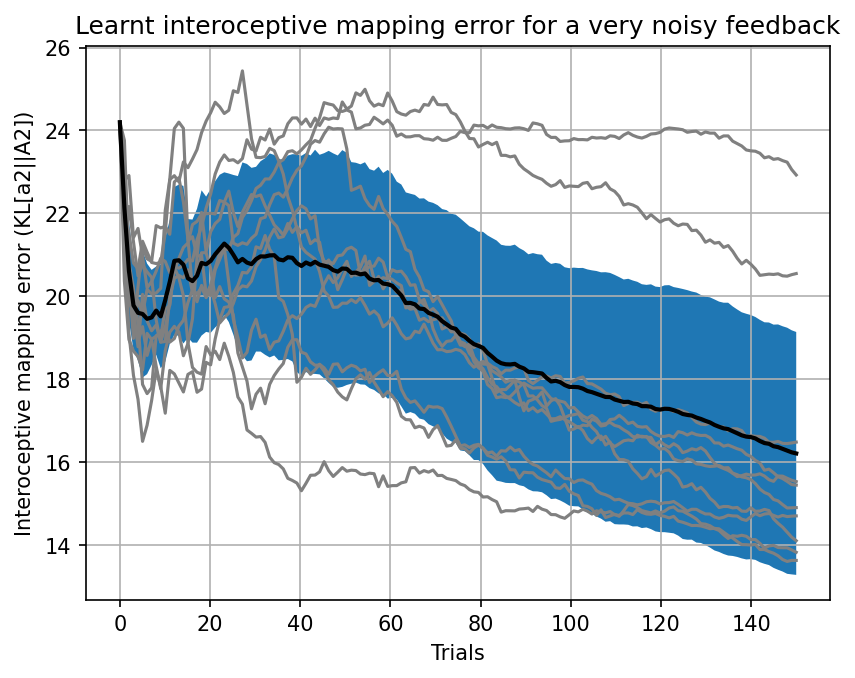

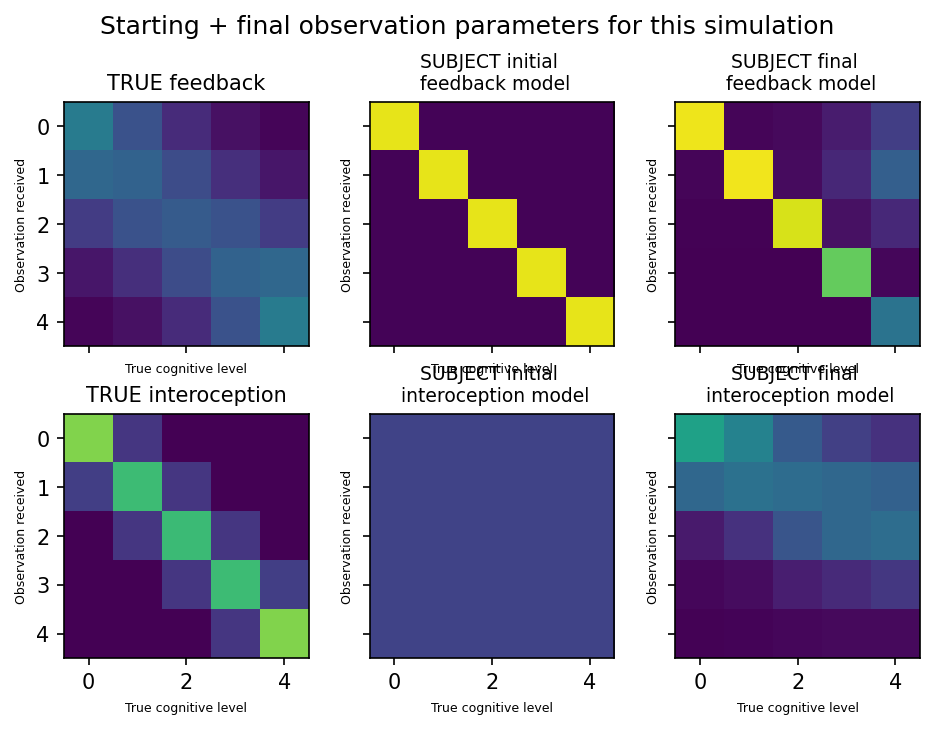

In [4]:
savepath = os.path.join(SAVING_FOLDER,"simulation3")

sigma_process = 1.5 # The noise of the feedback
sigma_intero = 0.5 # The noise of the interoceptive observer
sigma_model = 0.01  # The subject belief about interoceptive observer noise
k1a = 10.0 # The subject is confident in its initial (external) feedback prior
k2a = 10.0 # The subject is pretty used to its interoceptive signal and it takes quite a lot of experience to tweak it

N_subj = 10
N_trials = 150

run_and_save_interoceptive_model(savepath,
        sigma_process,sigma_intero, # True environment parameters
        sigma_model,k1a,k2a,       # Subject initial parameters
        N_subj,N_trials,
        overwrite=False)

# PLOTTING SIMULATION RESULTS
_stm,_weight,_Nsubj,_Ntrials = extract_training_data(savepath)
subject = 4 # What subject are we studying ?
plot_these_trials = [0,1,2,5,10,50,149]
for trial in (plot_these_trials):
    plot_one_trial(_stm,_weight,subject,trial,"Trial " + str(trial))
figure = plot_training_curve(_stm,_weight,"Subject average performances accross trials for a perfect (true + expected) feedback")

# Plot the interoceptive mapping error 
fig2,ax2 = plt.subplots(1,dpi=150,sharex=True,sharey=True)
true_A = _weight[subj][0][0]["a"][1]
a_dist_array = np.array([[dist_kl_dir(_weight[subj][trial][1]["a"][1],true_A) for trial in range(_Ntrials)] for subj in range(_Nsubj)])
xs = np.linspace(0,a_dist_array.shape[1],a_dist_array.shape[1])
mean_intero = np.mean(a_dist_array,axis=0)
std_intero = np.std(a_dist_array,axis=0)
ax2.fill_between(xs,mean_intero-std_intero,mean_intero+std_intero)
for i in range(a_dist_array.shape[0]):
    ax2.plot(xs,a_dist_array[i,:],color='grey')
ax2.plot(xs,mean_intero,color="black",linewidth=2)
ax2.set_title("Learnt interoceptive mapping error for a very noisy feedback")
ax2.set_xlabel("Trials")
ax2.set_ylabel("Interoceptive mapping error (KL[a2||A2])")
ax2.grid()

# Plot feedback perception matrices
fig,axes = plt.subplots(2,3,dpi=150,sharex=True,sharey=True)
axes[0,0].imshow(actynf.normalize(_weight[0][0][0]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,0].set_title("TRUE feedback",fontsize = 10)
axes[0,1].imshow(actynf.normalize(_weight[0][0][1]["a"][0]),vmin=0.0,vmax=1.0)
axes[0,1].set_title("SUBJECT initial \n feedback model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][0].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][0]
axes[0,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[0,2].set_title("SUBJECT final \n feedback model",fontsize = 9)

axes[1,0].imshow(actynf.normalize(_weight[0][0][0]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,0].set_title("TRUE interoception",fontsize = 10)
axes[1,1].imshow(actynf.normalize(_weight[0][0][1]["a"][1]),vmin=0.0,vmax=1.0)
axes[1,1].set_title("SUBJECT initial \n interoception model",fontsize = 9)

all_end_feedback_models = np.zeros((_weight[0][0][1]["a"][1].shape)+(_Nsubj,))
for subj in range(_Nsubj) : 
    all_end_feedback_models[...,subj] = _weight[subj][-1][1]["a"][1]
axes[1,2].imshow(np.mean(actynf.normalize(all_end_feedback_models),axis=-1),vmin=0.0,vmax=1.0)
axes[1,2].set_title("SUBJECT final \n interoception model",fontsize = 9)

for ax in axes.reshape(-1):
    ax.set_ylabel("Observation received",fontsize = 6)
    ax.set_xlabel("True cognitive level",fontsize = 6)
fig.suptitle("Starting + final observation parameters for this simulation")
fig.tight_layout()

Just like in the previous simulations, when the explicit feedback noise level gets too high, learning becomes impossible for the subject. 

Here, the agents also don't manage to learn their internal observation mapping, in effect rendering the training useless (or even damaging to the subject !). Let's see what would happen if the subject worked in the optimal range discussed in 3.2.2. 

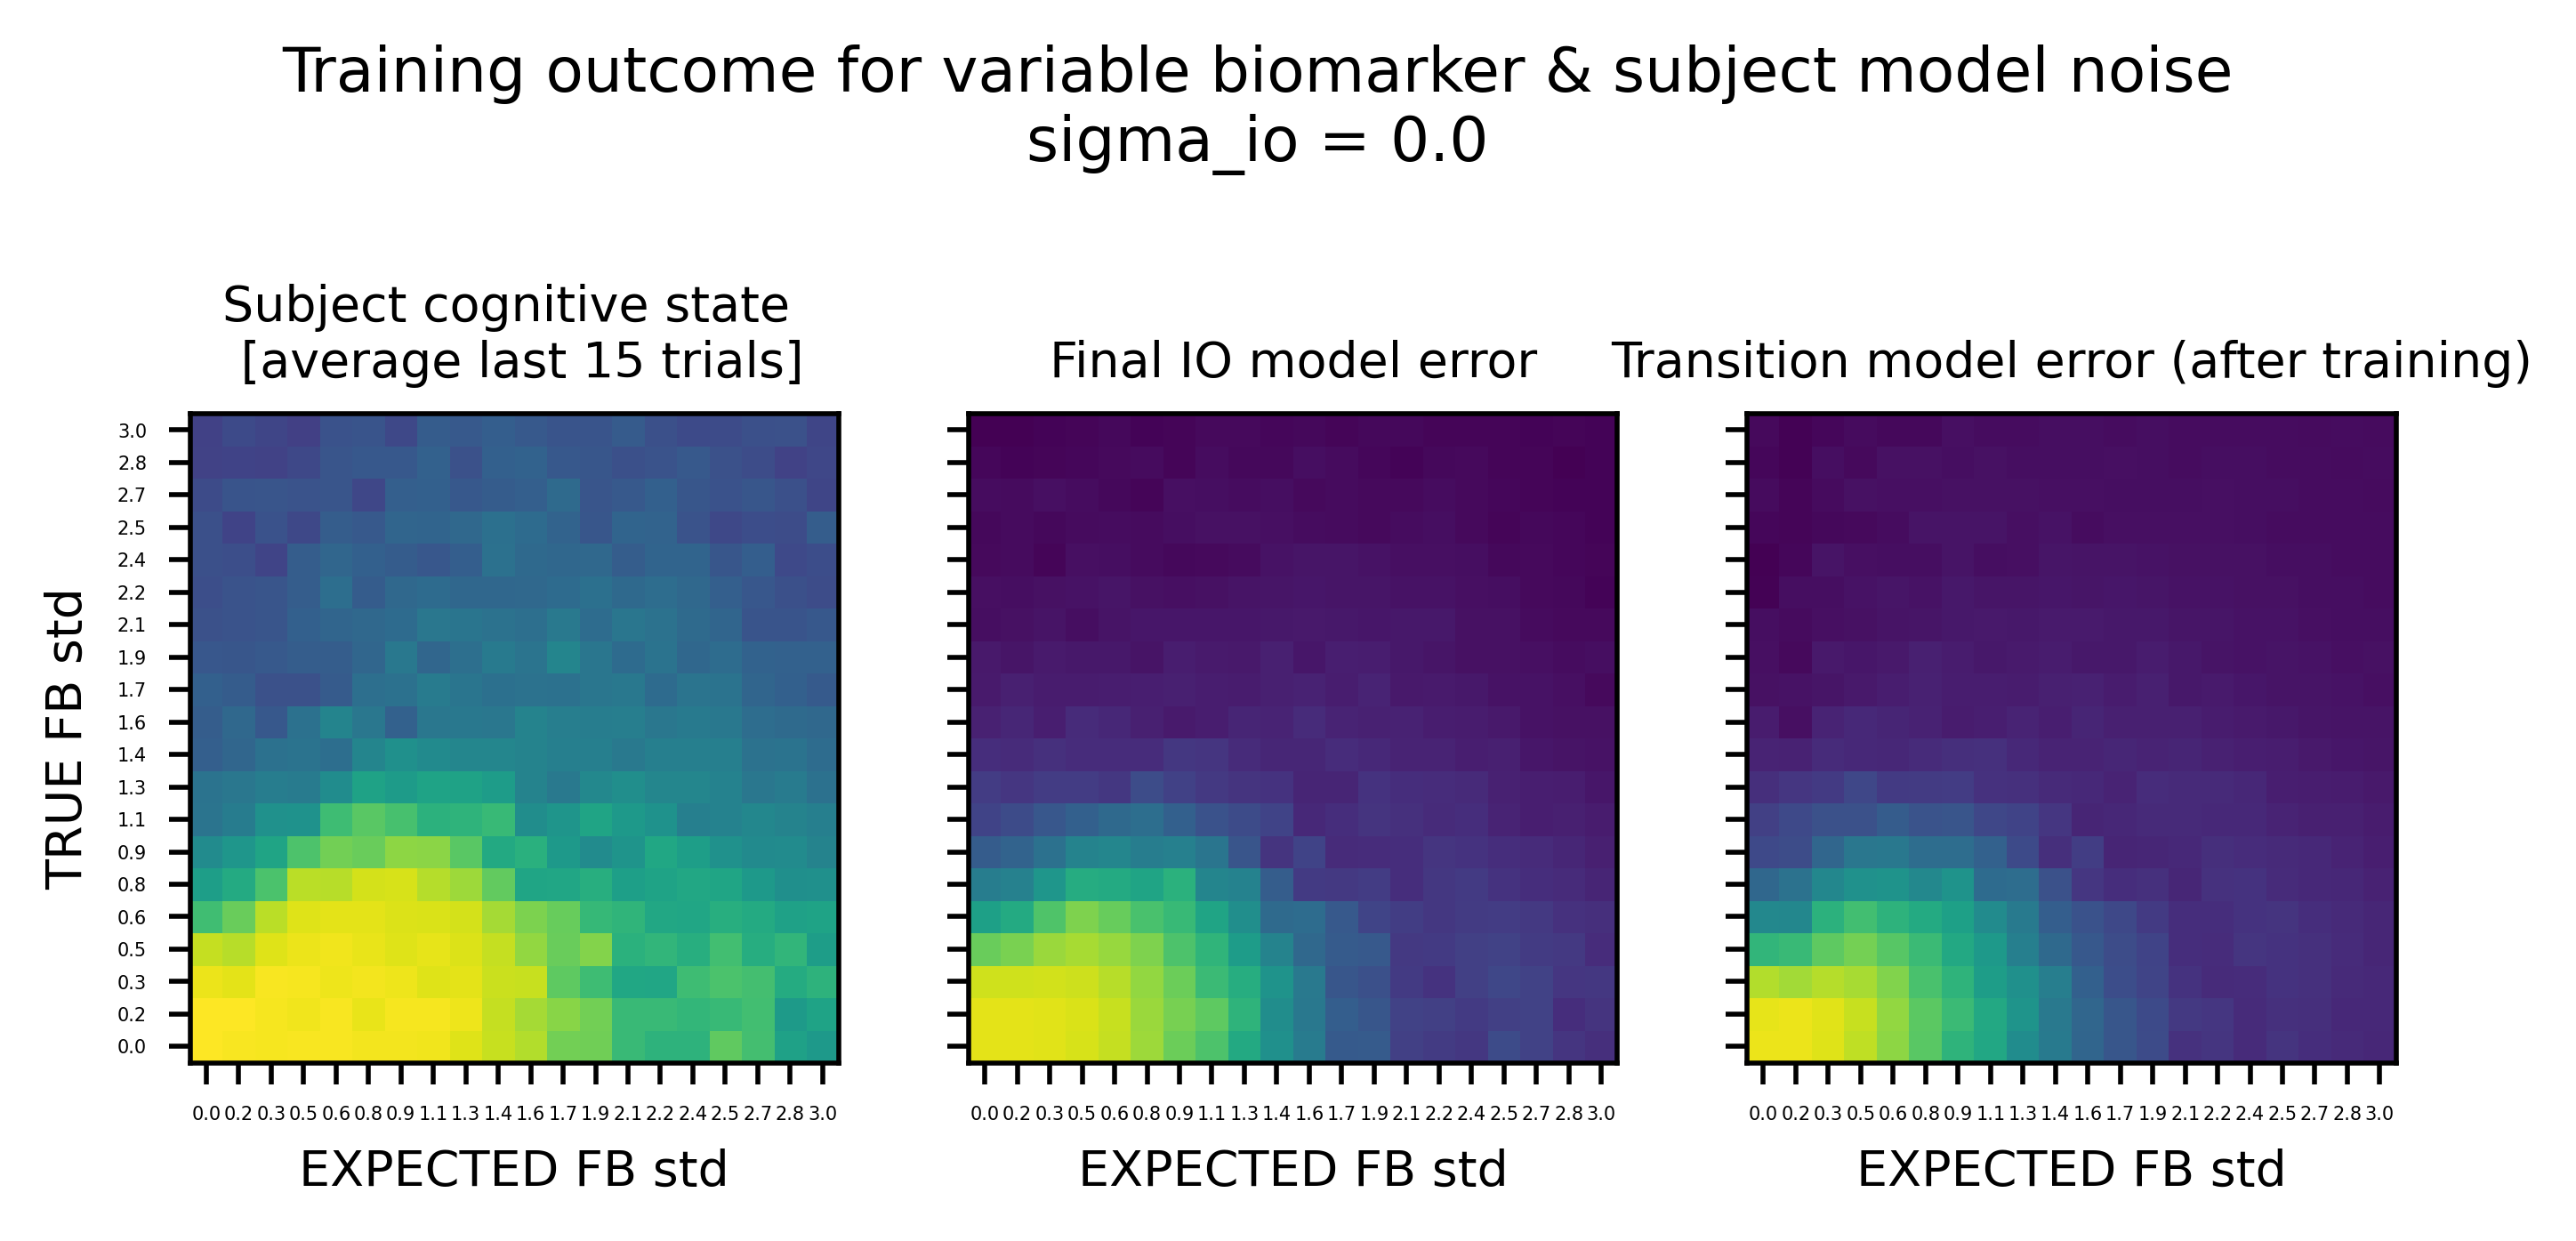

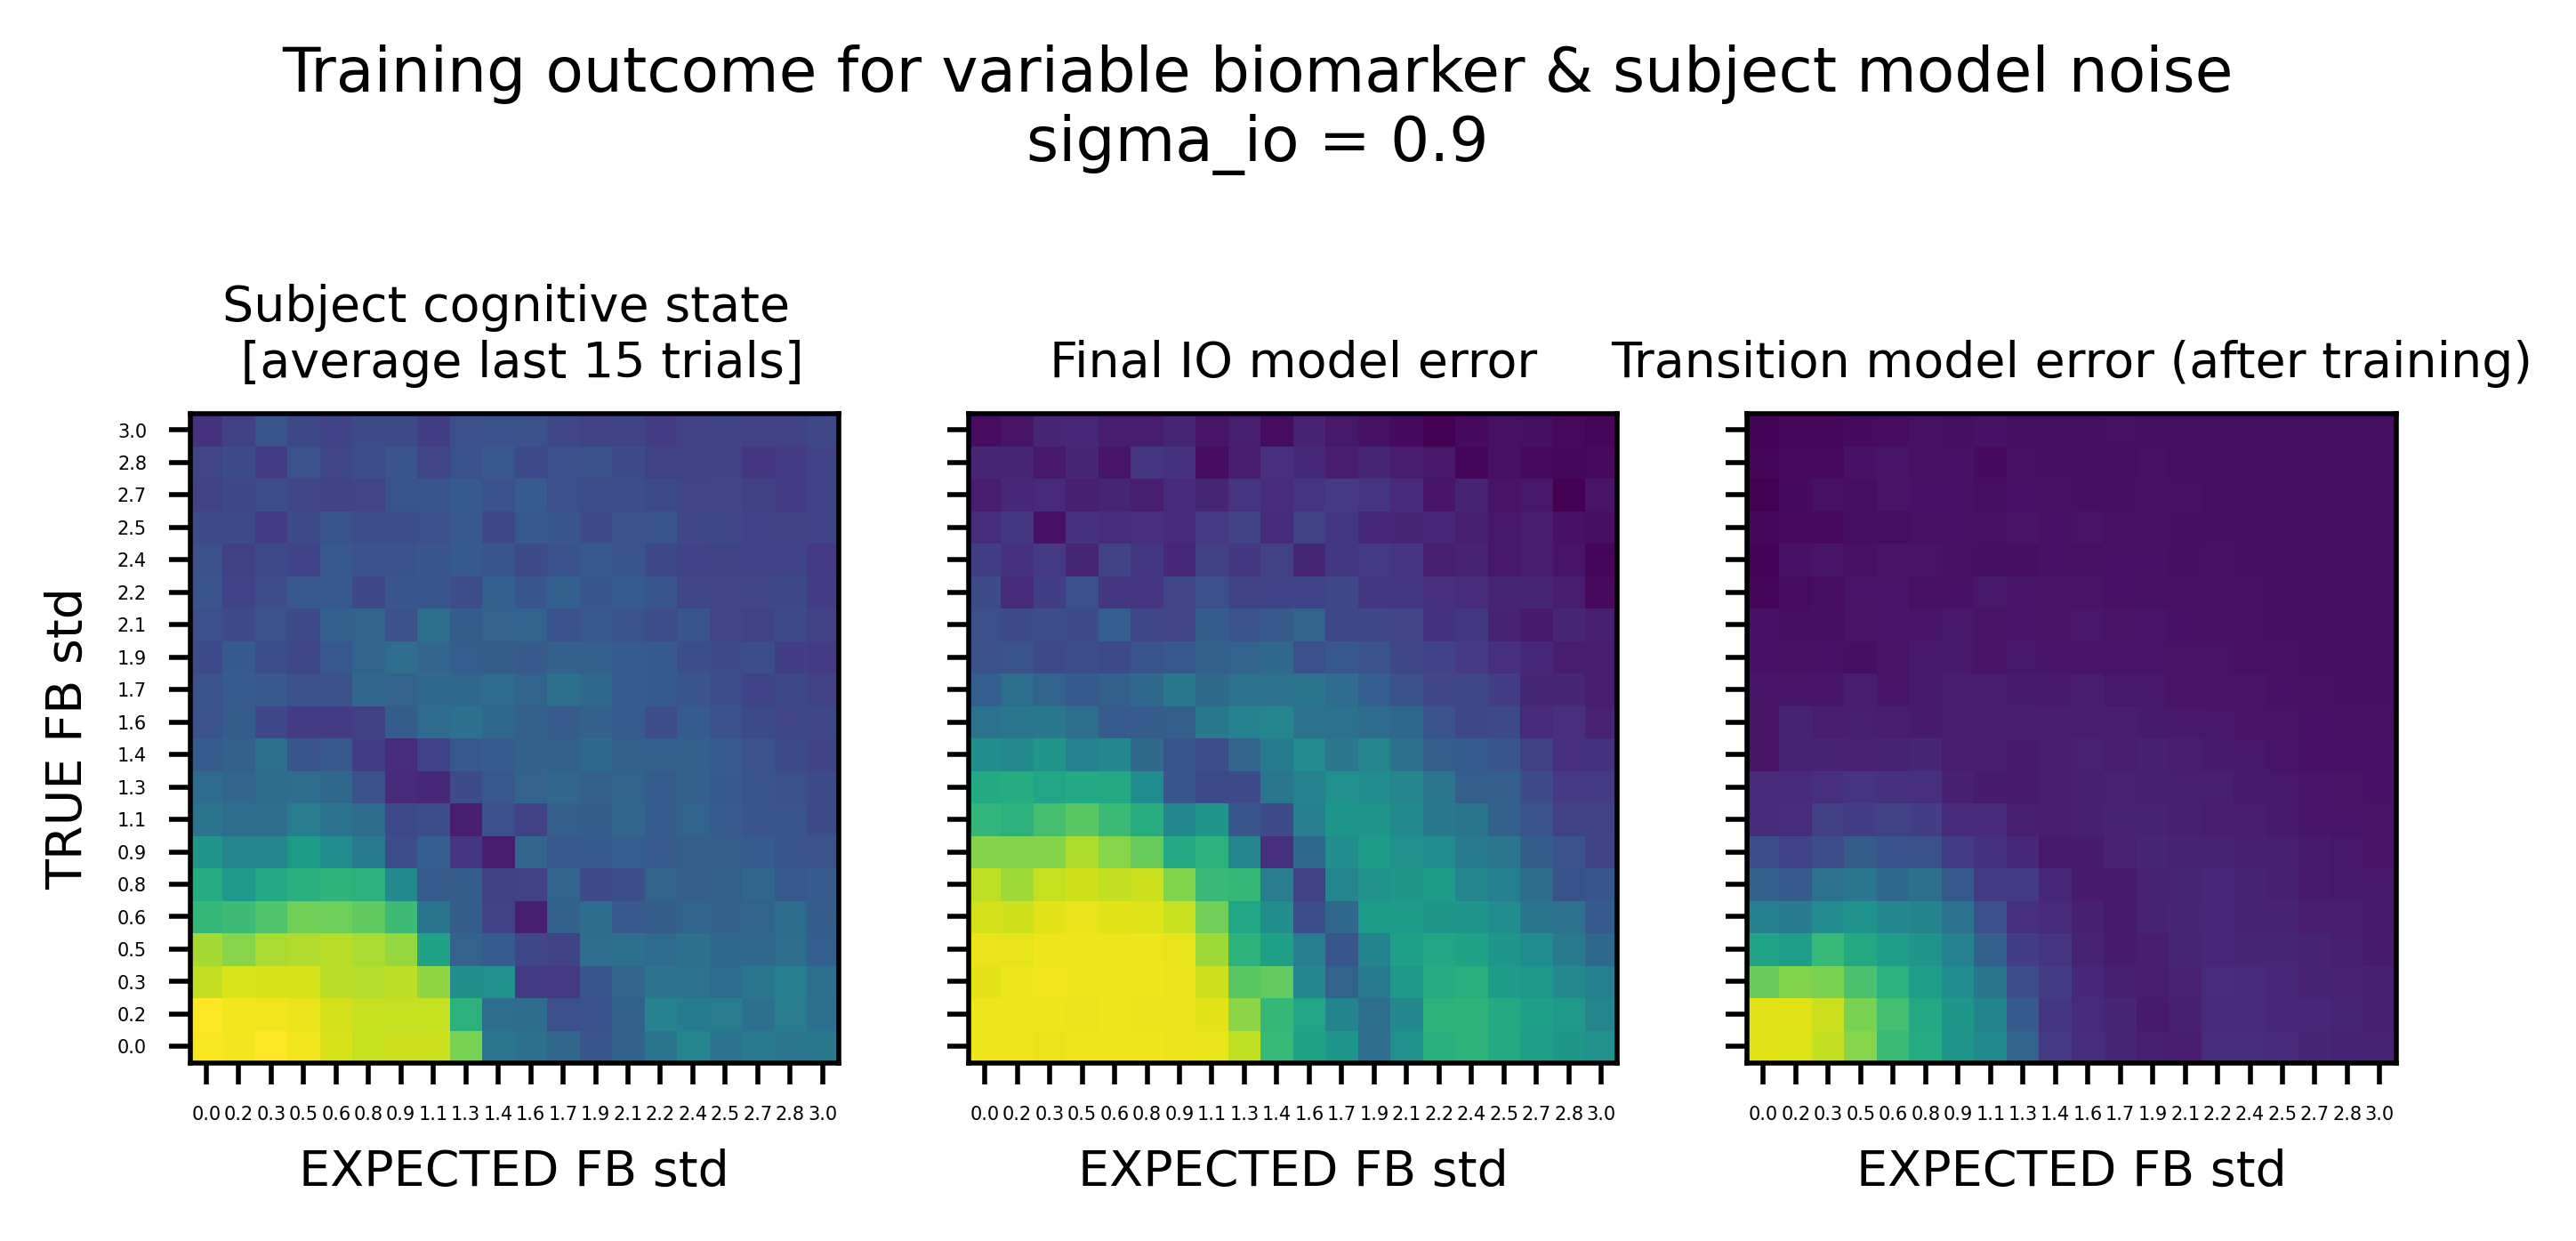

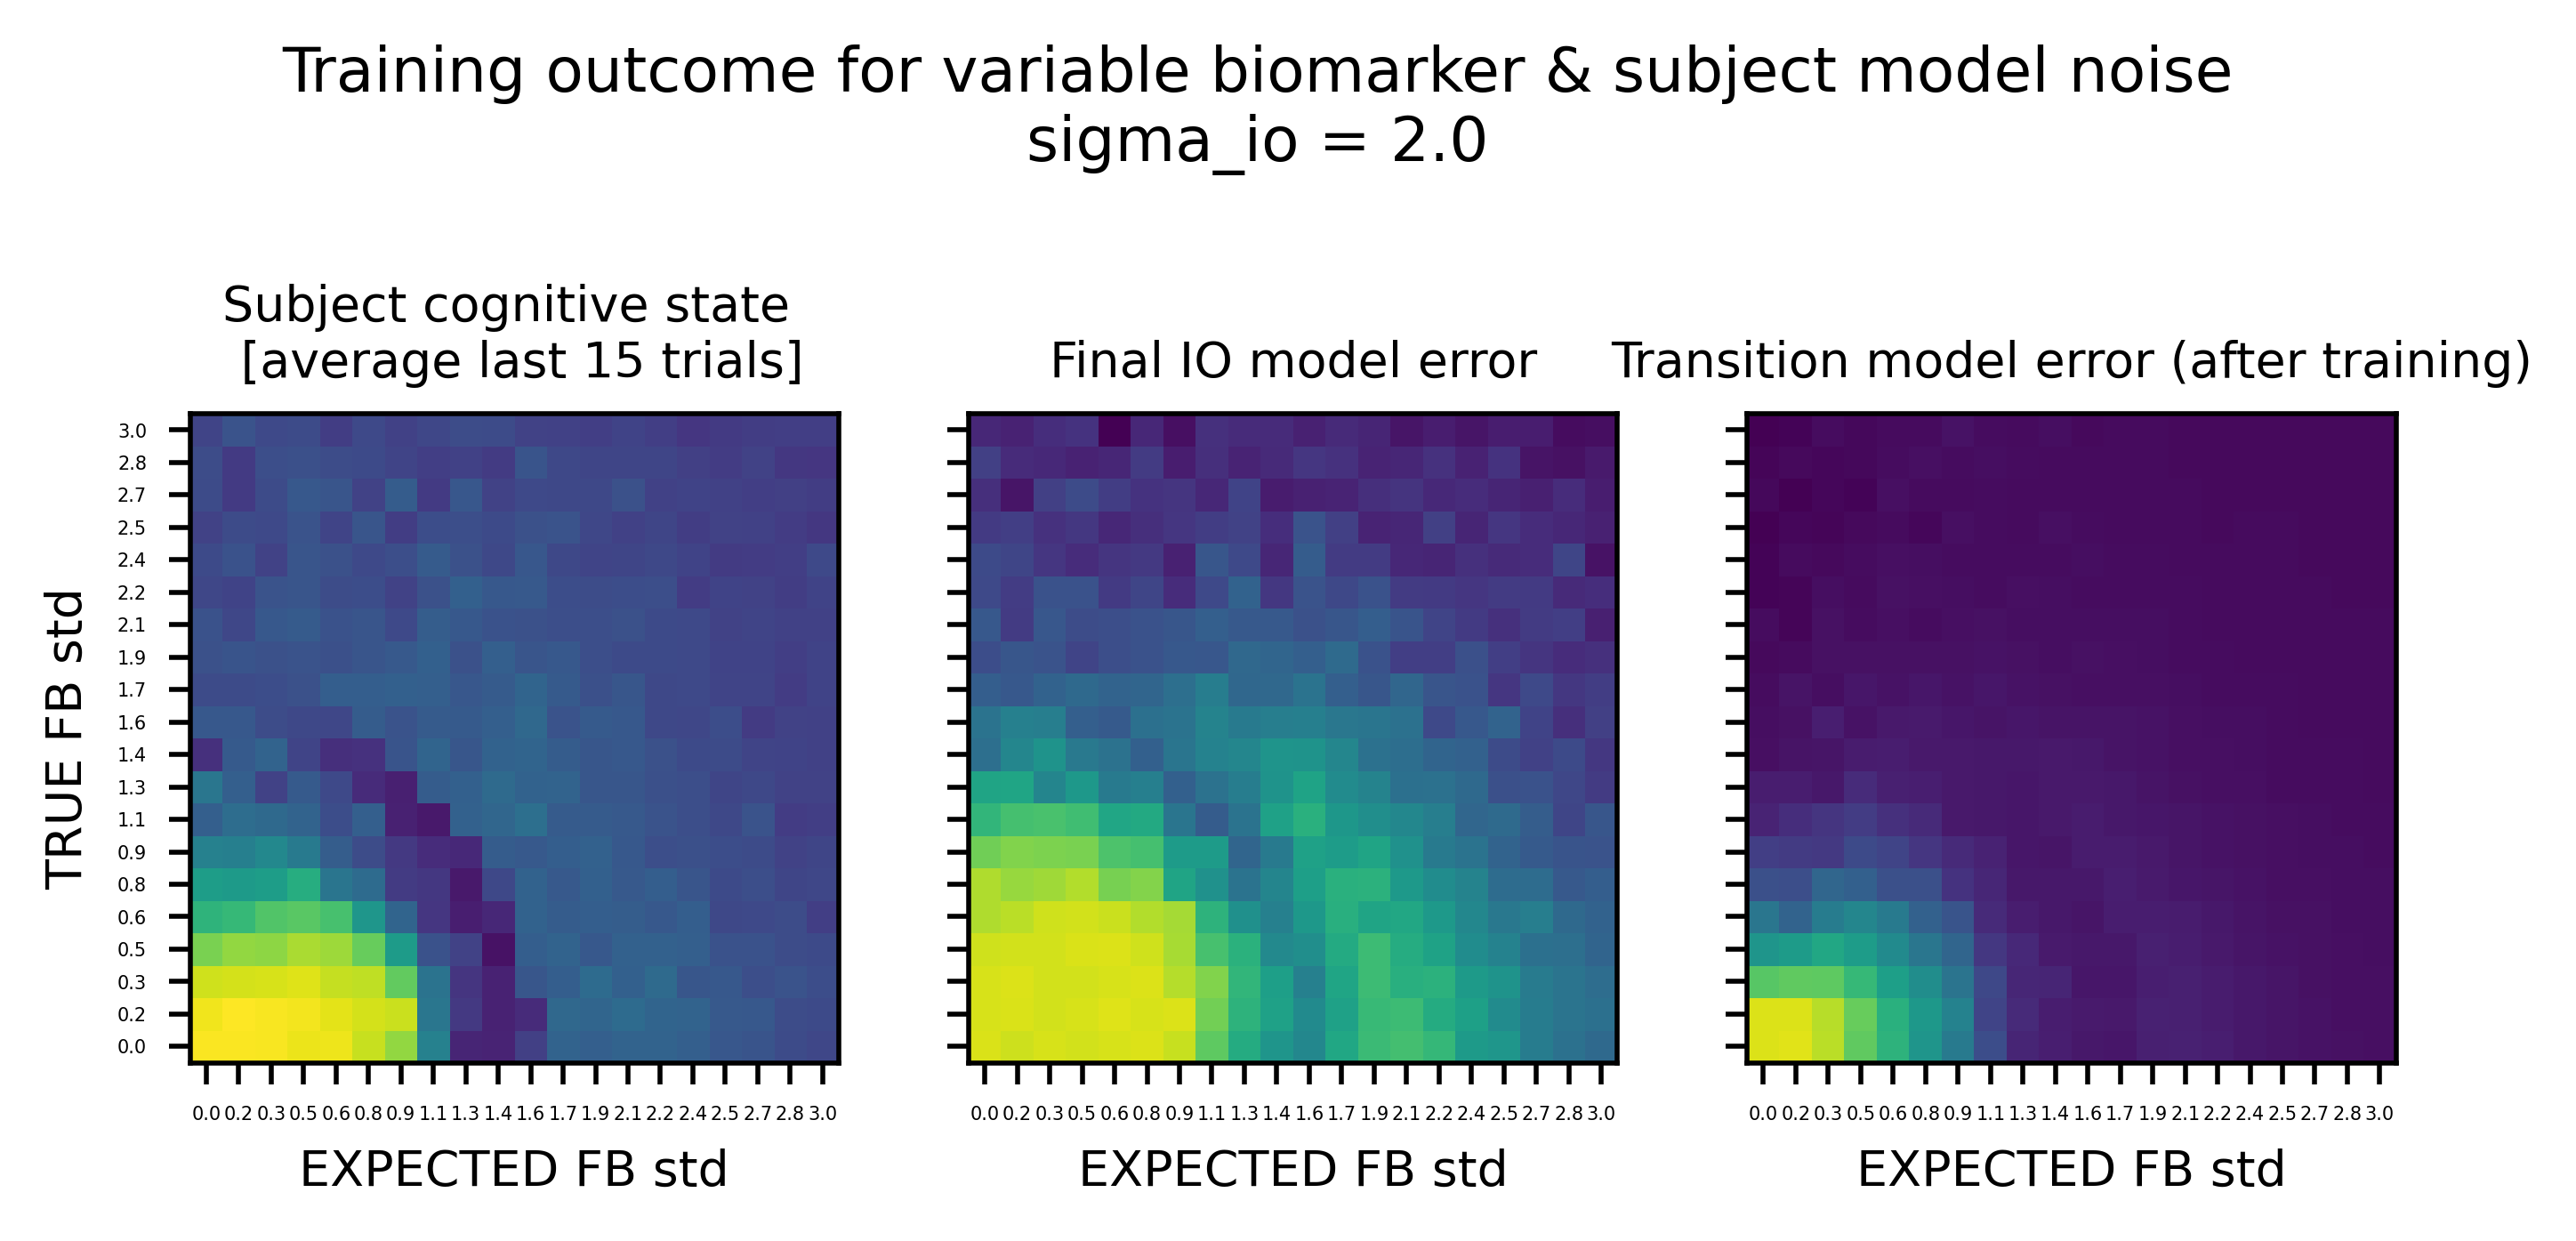

In [5]:
# Import the values we're going to plot :  
# (we ran cluster computations for sigma_feedback in [0,3] and sigma_io in [0,2]

simulation_parameters_path = os.path.join(SAVING_FOLDER,"simulation4","KEYS")
with open(simulation_parameters_path, 'rb') as handle:
        simulation_parameters = pickle.load(handle)

simulation_performances_path = os.path.join(SAVING_FOLDER,"simulation4","PERFS")
with open(simulation_performances_path, 'rb') as handle:
        simulation_performances = pickle.load(handle)

from tools_trial_plots import colormap_plot_2D

# 1. colormap plots !
plot_these_kio_index_vals = [0,4,9]
for kio in plot_these_kio_index_vals:
        fig = colormap_plot_2D(simulation_parameters[:,:,0,:2],
                               simulation_performances['s'][:,:,kio,:,:],
                               simulation_performances['a'][:,:,kio,:],
                               simulation_performances['b'][:,:,kio,:],
                title="sigma_io = " + str(np.round(simulation_parameters[0,0,kio,2],1)),interoceptive_plot=True)
        


Finally, let's try to build a gif of interoceptive observer mappings as they evolve accross trials depending on simulation parameters !

In [7]:
from sklearn.preprocessing import normalize



simulation_parameters_path = os.path.join(SAVING_FOLDER,"simulation4","KEYS")
with open(simulation_parameters_path, 'rb') as handle:
        simulation_parameters = pickle.load(handle)

simulation_performances_path = os.path.join(SAVING_FOLDER,"simulation4","PERFS")
with open(simulation_performances_path, 'rb') as handle:
        simulation_performances = pickle.load(handle)

simulation_parameters_path = os.path.join(SAVING_FOLDER,"simulation4","IO_MATRICES")
with open(simulation_parameters_path, 'rb') as handle:
        io_matrices_array = pickle.load(handle)

print(io_matrices_array.shape)

def matrix_color_interp(mat,cold,hot):
    mat = mat[:, :, np.newaxis]
    cold = cold[np.newaxis,np.newaxis,:]
    hot = hot[np.newaxis,np.newaxis,:]
    return mat*hot + (1-mat)*cold

fixed_io_index = 5
K = io_matrices_array.shape[0]
No = io_matrices_array.shape[-1]
Ntrials =  io_matrices_array.shape[4]

full_image = np.zeros((K*(No+1)-1,K*(No+1)-1,3,Ntrials+1), dtype='uint8')
for t in range(Ntrials):
    for x in range(K):
        for y in range(K):
            x1 = int(x*(No+1))
            x2 = int(x*(No+1) + No)

            y1 = int(y*(No+1))
            y2 = int(y*(No+1) + No)

            mean_io_matrix = np.mean(normalize(io_matrices_array[x,y,fixed_io_index,:,t,:,:],axis=1),axis=0)
                # The mean of the Dirichlet weights for the 10 subjects
            # norm_io_mat = mean_io_matrix)
            # print(norm_io_mat)
            full_image[x1:x2,y1:y2,:,t+1] = matrix_color_interp(mean_io_matrix,np.array([0,0,0.0]),np.array([1.0,0,0.0]))
    
    
fig,ax = plt.subplots(1,dpi=400)
ax.axis('off')
im = ax.imshow(full_image[...,t])

def init():
    im.set_data(full_image[...,0])
    return [im]

# animation function.  This is called sequentially
def animate(i):
    a=im.get_array()
    a=a*np.exp(-0.001*i)    # exponential decay of the values
    im.set_array(a)
    return [im]

(20, 20, 10, 10, 100, 5, 5)


ValueError: Found array with dim 3. the normalize function expected <= 2.